## Criando uma rede neural simples

In [1]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

2024-11-11 15:38:47.806773: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 15:38:48.212459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 15:38:48.349677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 15:38:48.410111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 15:38:48.759211: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
len(X_train)

60000

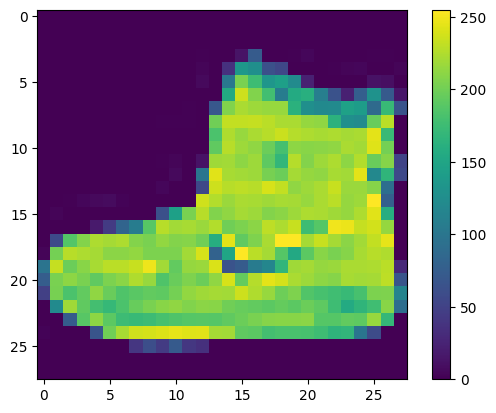

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
# Vetorizando imagens 28x28
X_train = X_train.reshape(-1, 28*28)

In [6]:
X_test = X_test.reshape(-1, 28*28)

In [7]:
# Definimos um objeto do tipo Sequential (sequência de camadas)
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

/home/lorran/github/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(tf.keras.layers.Dense(units=256, activation='relu', input_shape=(128, )))

In [10]:
model.add(tf.keras.layers.Dropout(0.2))

In [11]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [12]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1187 - sparse_categorical_accuracy: 0.6375
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5406 - sparse_categorical_accuracy: 0.8145
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4756 - sparse_categorical_accuracy: 0.8333
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4349 - sparse_categorical_accuracy: 0.8471
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4137 - sparse_categorical_accuracy: 0.8540
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3966 - sparse_categorical_accuracy: 0.8604
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3838 - sparse_categorical_accuracy: 0.8644
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3663 - sparse_categorical_accuracy: 0.8686
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3599 - sparse_categorical_accuracy: 0.8712
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3462 - sparse_categorical_accuracy: 0.8733


In [16]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8715999722480774


In [17]:
test_loss

0.3499774634838104

In [18]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
predictions[0]=np.around(predictions[0],2)

In [20]:
np.argmax(predictions[0])

9

In [21]:
y_test[0]

9

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [24]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

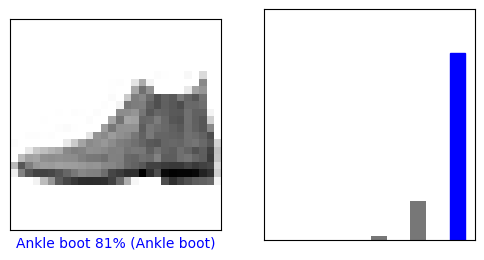

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

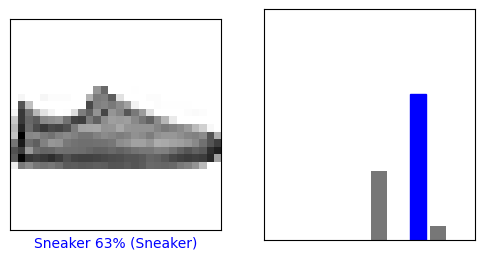

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

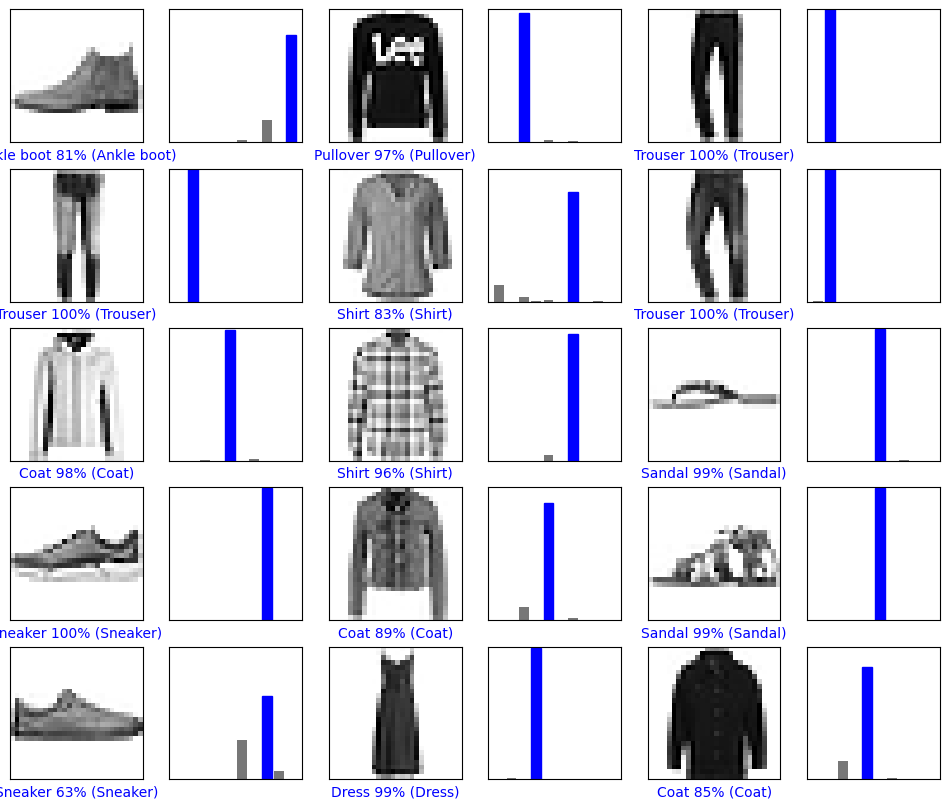

In [27]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [28]:
# Grab an image from the test dataset.
img = X_test[0]

print(img.shape)

(28, 28)


In [29]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(1, 28, 28), dtype=float32). Expected shape (None, 784), but input has incompatible shape (1, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 28, 28), dtype=uint8)
  • training=False
  • mask=None

In [1]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

NameError: name 'plot_value_array' is not defined

Criando a matriz de confusão:

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

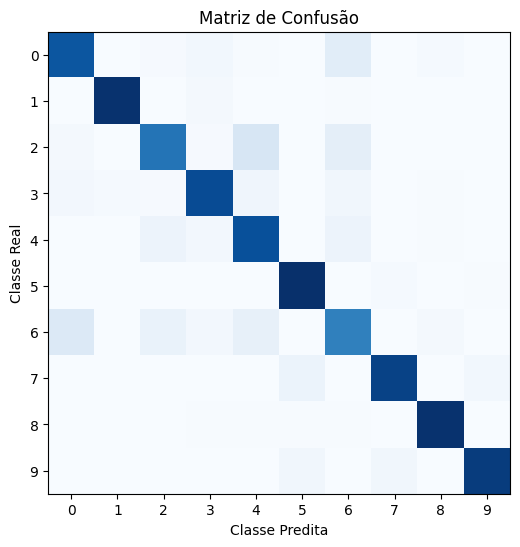

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(confusion_matrix, cmap='Blues')

plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')

plt.xticks(ticks=range(10), labels=range(10))
plt.yticks(ticks=range(10), labels=range(10))

plt.colorbar()

for i in range(10):
    for j in range(10):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center')

plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

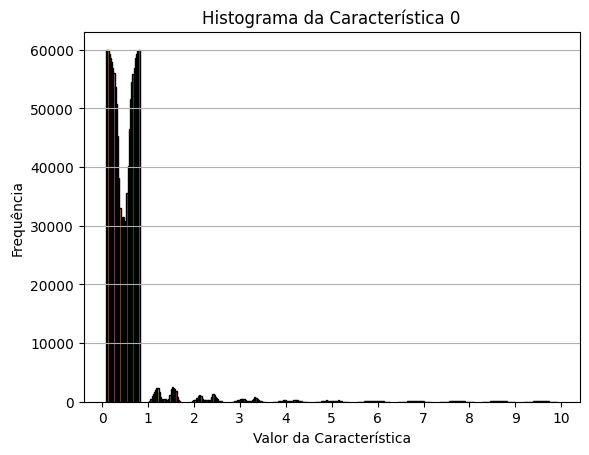

In [ ]:
# Carregar os dados em um tensor do TensorFlow (opcional)
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Selecionar uma característica específica para o histograma
feature_index = 0  # índice da característica a ser visualizada
feature_data = X_train[:, feature_index]

# Plotar o histograma
plt.hist(feature_data, bins=11, edgecolor='black', range=(0,10))
plt.title(f'Histograma da Característica {feature_index}')
plt.xlabel('Valor da Característica')
plt.ylabel('Frequência')
plt.xticks(np.arange(0,11,1))
plt.grid(axis='y')
plt.show()


In [ ]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("fashion_model.h5")

ValueError: The filename must end in `.weights.h5`. Received: filepath=fashion_model.h5